In [22]:
import pandas as pd
import joblib
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [25]:
df_train = pd.read_csv('../static/data/titanic_train.csv')
df_train.head(3)

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S

In [26]:
df_test = pd.read_csv('../static/data/titanic_test.csv')
df_test.head(3)

PassengerId  Pclass                              Name     Sex   Age  SibSp  \
0          892       3                  Kelly, Mr. James    male  34.5      0   
1          893       3  Wilkes, Mrs. James (Ellen Needs)  female  47.0      1   
2          894       2         Myles, Mr. Thomas Francis    male  62.0      0   

   Parch  Ticket    Fare Cabin Embarked  
0      0  330911  7.8292   NaN        Q  
1      0  363272  7.0000   NaN        S  
2      0  240276  9.6875   NaN        Q

In [27]:
X_test = df_test.iloc[:, 1:].values
y_test = df_test.iloc[:, 0].values
X_test.shape, y_test.shape

((418, 10), (418,))

In [41]:
scaler = MinMaxScaler()
scaler.fit(df_train.iloc[:, 1:])

ValueError: could not convert string to float: 'Braund, Mr. Owen Harris'

In [2]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### NaN 값 찾기 

In [32]:
df_train['Age'].fillna(df_train['Age'].mean(), inplace=True)
df_train['Cabin'].fillna('N',inplace=True)
df_train['Embarked'].fillna('N',inplace=True)
print('데이터 세트 Null 값 갯수 ', df_train.isnull().sum().sum())

데이터 세트 Null 값 갯수  0


In [33]:
print('Sex 값 분포 :\n', df_train['Sex'].value_counts())

Sex 값 분포 :
 male      577
female    314
Name: Sex, dtype: int64


In [34]:
print('Cabin 값 분포 :\n', df_train['Cabin'].value_counts())

Cabin 값 분포 :
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
              ... 
E49              1
A7               1
A26              1
D9               1
D11              1
Name: Cabin, Length: 148, dtype: int64


In [35]:
print('Embarked 값 분포 :\n', df_train['Embarked'].value_counts())

Embarked 값 분포 :
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [36]:
df_train['Cabin'] = df_train['Cabin'].str[:1]
print(df_train['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [37]:
df_train.groupby(['Sex', 'Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

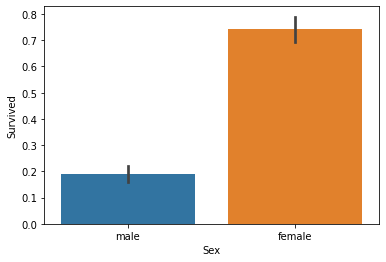

In [38]:
sns.barplot(x='Sex', y = 'Survived', data=df_train);

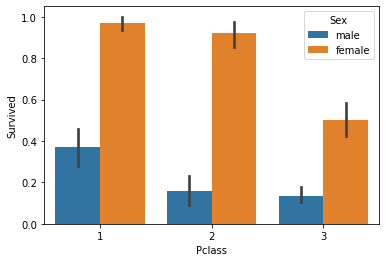

In [39]:
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train);

### 데이터 전처리

In [40]:
from sklearn.preprocessing import LabelEncoder

features = ['Cabin', 'Sex', 'Embarked']
for feature in features:
    le = LabelEncoder()
    df_train[feature] = le.fit_transform(df_train[feature])

titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500     N        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250     N        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500     N        S

In [16]:
# Null 처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    return df

# 머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'], axis=1, inplace=True)
    return df

# 레이블 인코딩 수행. 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = LabelEncoder()
        df[feature] = le.fit_transform(df[feature])
    return df

# 앞에서 설정한 Data Preprocessing 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

### 생존자 예측

In [19]:
# 원본 데이터를 재로딩 하고, feature데이터 셋과 Label 데이터 셋 추출. 
titanic_df = pd.read_csv('../static/data/train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df, y_titanic_df, train_size=0.2, random_state=1
)

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# DecisionTreeClassifier 학습/예측/평가
dt_clf = DecisionTreeClassifier(random_state=11)
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print(f'DecisionTreeClassifier 정확도: {accuracy_score(y_test, dt_pred):.4f}')

# RandomForestClassifier 학습/예측/평가
rf_clf = RandomForestClassifier(random_state=11)
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print(f'RandomForestClassifier 정확도:{accuracy_score(y_test, rf_pred):.4f}')

# LogisticRegression 학습/예측/평가
lr_clf = LogisticRegression()
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print(f'LogisticRegression 정확도: {accuracy_score(y_test, lr_pred):.4f}')

# SupportVectorClassifier 학습/예측/평가
sv_clf = SVC(random_state=11)
sv_clf.fit(X_train, y_train)
sv_pred = sv_clf.predict(X_test)
print(f'SupportVectorClassifier 정확도: {accuracy_score(y_test, sv_pred):.4f}')

DecisionTreeClassifier 정확도: 0.7714
RandomForestClassifier 정확도:0.7952
LogisticRegression 정확도: 0.7672
SupportVectorClassifier 정확도: 0.6704
